In [1]:
import os
import pandas as pd
import numpy as np
from os import listdir
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import skimage
from skimage import transform
from skimage.transform import resize
import scipy

Using TensorFlow backend.


In [2]:
from scipy import misc
from scipy.misc import imresize, imread

In [3]:
path = os.getcwd()

In [4]:
path = path+'\\256_ObjectCategories'
path

'C:\\Users\\clyde\\dask-tutorial-scipy-2018\\256_ObjectCategories'

In [5]:
os.chdir(path)
listdir()[1:257]

['001.ak47',
 '002.american-flag',
 '003.backpack',
 '004.baseball-bat',
 '005.baseball-glove',
 '006.basketball-hoop',
 '007.bat',
 '008.bathtub',
 '009.bear',
 '010.beer-mug',
 '011.billiards',
 '012.binoculars',
 '013.birdbath',
 '014.blimp',
 '015.bonsai-101',
 '016.boom-box',
 '017.bowling-ball',
 '018.bowling-pin',
 '019.boxing-glove',
 '020.brain-101',
 '021.breadmaker',
 '022.buddha-101',
 '023.bulldozer',
 '024.butterfly',
 '025.cactus',
 '026.cake',
 '027.calculator',
 '028.camel',
 '029.cannon',
 '030.canoe',
 '031.car-tire',
 '032.cartman',
 '033.cd',
 '034.centipede',
 '035.cereal-box',
 '036.chandelier-101',
 '037.chess-board',
 '038.chimp',
 '039.chopsticks',
 '040.cockroach',
 '041.coffee-mug',
 '042.coffin',
 '043.coin',
 '044.comet',
 '045.computer-keyboard',
 '046.computer-monitor',
 '047.computer-mouse',
 '048.conch',
 '049.cormorant',
 '050.covered-wagon',
 '051.cowboy-hat',
 '052.crab-101',
 '053.desk-globe',
 '054.diamond-ring',
 '055.dice',
 '056.dog',
 '057.dol

In [6]:
def loadBatchImages(path,nSamples,nVal):
    catList = listdir(path)
    loadedImagesTrain = []
    loadedLabelsTrain = []
    loadedImagesVal = []
    loadedLabelsVal = []
    for cat in catList[1:257]:
        deepPath = path+ "\\" +cat+"\\"
        imageList = listdir(deepPath)
        print(deepPath)
        indx = 0
        for images in imageList[0:nSamples + nVal]:                
            img = load_img(deepPath + images)
            img = img_to_array(img)
            img = misc.imresize(img, (200,200))
            if indx < nSamples:
                loadedLabelsTrain.append(int(images[0:3])-1)
                loadedImagesTrain.append(img)
            else:
                loadedLabelsVal.append(int(images[0:3])-1)
                loadedImagesVal.append(img)
            indx += 1
    return loadedImagesTrain, loadedLabelsTrain, loadedImagesVal, loadedLabelsVal
#loadedImagesTrain, np_utils.to_categorical(loadedLabelsTrain), loadedImagesVal, np_utils.to_categorical(loadedLabelsVal)

In [7]:
nSamples = 20
nVal = 10  
data_train, labels_train, data_test, labels_test = loadBatchImages(path,nSamples,nVal)

C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\001.ak47\


c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  from ipykernel import kernelapp as app


C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\002.american-flag\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\003.backpack\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\004.baseball-bat\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\005.baseball-glove\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\006.basketball-hoop\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\007.bat\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\008.bathtub\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\009.bear\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\010.beer-mug\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\011.billiards\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\012.binoculars\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\013.birdbath\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\014.blimp\
C:\Users\clyd

C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\110.hourglass\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\111.house-fly\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\112.human-skeleton\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\113.hummingbird\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\114.ibis-101\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\115.ice-cream-cone\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\116.iguana\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\117.ipod\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\118.iris\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\119.jesus-christ\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\120.joy-stick\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\121.kangaroo-101\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\122.kayak\
C:\Users\cly

C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\218.tennis-racket\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\219.theodolite\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\220.toaster\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\221.tomato\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\222.tombstone\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\223.top-hat\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\224.touring-bike\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\225.tower-pisa\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\226.traffic-light\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\227.treadmill\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\228.triceratops\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\229.tricycle\
C:\Users\clyde\dask-tutorial-scipy-2018\256_ObjectCategories\230.trilobite-101\
C

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

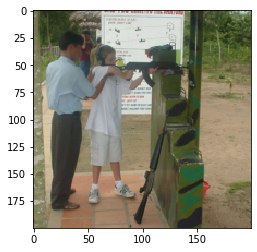

In [9]:
from skimage.util import view_as_blocks
imshow(data_train[:][:][7])

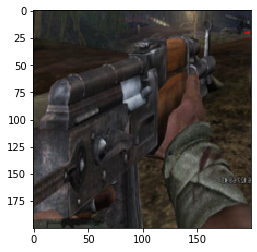

In [10]:
imshow(data_train[:][:][3])

In [11]:
from skimage.color import rgb2gray

In [12]:
n_samples_train = np.shape(data_train)[0]
data_train_gray = np.zeros(shape=(n_samples_train,200,200))
for index in range(np.shape(data_train)[0]):
    data_train_gray[index][:][:] = rgb2gray(data_train[index][:][:][:])

In [13]:
n_samples_test = np.shape(data_test)[0]
data_test_gray = np.zeros(shape=(n_samples_test,200,200))
for index in range(n_samples_test):
        data_test_gray[index][:][:]= rgb2gray(data_test[index][:][:][:])

In [15]:
dtrain_reshape = data_train_gray.reshape(n_samples_train,-1)
dtrain_reshape.shape
200*200

40000

In [16]:
dtest_reshape = data_test_gray.reshape(n_samples_test,-1)

In [17]:
import sklearn
from sklearn.decomposition import PCA as RandomizedPCA
n_components = 150 

pca = RandomizedPCA(n_components=n_components, whiten=True).fit(dtrain_reshape)

#eigenobjects = pca.components_.reshape((n_components, 200, 200))

In [18]:
print("Projecting the input data on the eigenobjects orthonormal basis")
X_train_pca = pca.transform(dtrain_reshape)
X_test_pca = pca.transform(dtest_reshape)

Projecting the input data on the eigenobjects orthonormal basis


In [19]:
X_train_pca.shape

(5120, 150)

In [20]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X, y = X_train_pca, labels_train

start = time.time()
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'),n_jobs=4)
clf.fit(X, y)
end = time.time()
print("Single SVC", end - start, clf.score(X,y))
pred_svm = clf.predict_proba(X)

Single SVC 1140.2876889705658 0.2541015625


In [21]:
n_estimators = 10
start = time.time()
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X, y)
end = time.time()
print("Bagging SVC", end - start, clf.score)
pred_bagsvm = clf.predict_proba(X)

ValueError: operands could not be broadcast together with shapes (0,) (5120,) 

In [24]:
X, y = X_train_pca, labels_train

clf.fit(X,y)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=SVC(C=1.0,
                                                                   cache_size=200,
                                                                   class_weight='balanced',
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=3,
                                                                   gamma='auto_deprecated',
                                                                   kernel='linear',
                                                                   max_iter=-1,
                                                                   probability=True,
                                                                   random_state=None,
                                                                   shri

In [69]:
X, y = X_train_pca, labels_train
y= np.array(y)
y =y.reshape(y.size, 1)
clf.score(X,np.ones(y.size).T)

ValueError: operands could not be broadcast together with shapes (5120,) (0,) 

In [ ]:
start = time.time()
clf = RandomForestClassifier(min_samples_leaf=20)
clf.fit(X, y)
end = time.time()
print("Random Forest", end - start, clf.score(X,y))
pred_rf = clf.predict_proba(X)

In [20]:
from dask.distributed import Client
from sklearn.externals import joblib
import dask


c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


ModuleNotFoundError: No module named 'scipy_utils'

In [25]:
client = Client(processes=False)
client

Client Scheduler: inproc://10.0.0.219/15768/1 Dashboard: http://localhost:8787/status,Cluster Workers: 1 Cores: 4 Memory: 8.00 GB


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid,n_jobs=-1)

with joblib.parallel_backend("dask", scatter=[X_train_pca, labels_train]):
                   clf.fit(X_train_pca, labels_train)
        
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set


c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
distributed.utils - ERROR - '<' not supported between instances of 'NoneType' and 'tuple'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\utils.py", line 713, in log_errors
    yield
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\dashboard\scheduler.py", line 1438, in graph_doc
    graph = GraphPlot(scheduler, sizing_mode="stretch_both")
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\dashboard\scheduler.py", line 772, in __init__
    self.layout = GraphLayout(scheduler)
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 41, in __ini

distributed.scheduler - ERROR - 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b2

distributed.scheduler - ERROR - 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b2

distributed.scheduler - ERROR - 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b2

distributed.scheduler - ERROR - 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-5abb37df0555c143d6934c3f9b4024b7'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
Traceback (most recent call last):
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\scheduler.py", line 1746, in update_graph
    resources=resources,
  File "c:\users\clyde\anaconda3\envs\dask-scipy\lib\site-packages\distributed\diagnostics\graph_layout.py", line 50, in update_graph
    deps = dependencies[key]
KeyError: 'ndarray-dc65e557e7f25b22f6dc58f1f4811a1b'
distributed.scheduler - ERROR - 'ndarray-dc65e557e7f25b2

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [31]:
clf.best_estimator_

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
catList = listdir(path)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Predicting object names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(labels_test, y_pred, target_names=catList[1:257]))
#print(confusion_matrix(labels_test, y_pred,labels = catList[1:257])))

In [ ]:
import dask

In [ ]:
import dask.array as da
x = da.from_array(dtrain_reshape, chunks=(1000, 1000))

In [ ]:
dtrain_reshape.shape

In [ ]:
x.shape

In [ ]:
x

In [ ]:
np.shape(labels_train)

In [ ]:
np.size(data_train)

In [ ]:
np.shape(dtrain_reshape)

In [ ]:
200*200*3*256

In [ ]:
import scipy_utils


In [ ]:
from dask.distributed import Client
from sklearn.externals import joblib
import dask
import scipy


In [24]:
from scipy_utils import make_cluster

ModuleNotFoundError: No module named 'scipy_utils'

In [ ]:
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X, y = X_train_pca, labels_train

start = time.time()
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'),n_jobs=-1)
clf.fit(X, y)
end = time.time()
print("Single SVC", end - start, clf.score(X,y))
proba = clf.predict_proba(X)

n_estimators = 10
start = time.time()
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X, y)
end = time.time()
print("Bagging SVC", end - start, clf.score(X,y))
proba = clf.predict_proba(X)

start = time.time()
clf = RandomForestClassifier(min_samples_leaf=20)
clf.fit(X, y)
end = time.time()
print("Random Forest", end - start, clf.score(X,y))
proba = clf.predict_proba(X)